In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline

In [47]:
df_churndata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# df_churndata.isna().sum()

In [7]:
# df_churndata.isnull().sum()

In [30]:
df_churndata['TotalCharges'].iloc

ValueError: No axis named 2 for object type <class 'pandas.core.series.Series'>

In [48]:
df_churndata['Churn'] = df_churndata['Churn'].map({'Yes': 1, 'No':0})
df_churndata['gender'] = df_churndata['gender'].map({'Female': 0, 'Male':1})
df_churndata['Partner'] = df_churndata['Partner'].map({'Yes': 1, 'No':0})
df_churndata['Dependents'] = df_churndata['Dependents'].map({'Yes': 1, 'No':0})
df_churndata['PhoneService'] = df_churndata['PhoneService'].map({'Yes': 1, 'No':0})
df_churndata['PaperlessBilling'] = df_churndata['PaperlessBilling'].map({'Yes': 1, 'No':0})


df_churndata['MultipleLines']    = df_churndata['MultipleLines'].replace(['No phone service'], 'No')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['No phone service'], 'No')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['DSL'], 'Yes')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['Fiber optic'], 'Yes')
df_churndata['OnlineSecurity']   = df_churndata['OnlineSecurity'].replace(['No phone service', 'No internet service'], 'No')
df_churndata['OnlineBackup']     = df_churndata['OnlineBackup'].replace(['No phone service', 'No internet service'], 'No')
df_churndata['DeviceProtection'] = df_churndata['DeviceProtection'].replace(['No phone service', 'No internet service'], 'No')
df_churndata['TechSupport']      = df_churndata['TechSupport'].replace(['No phone service', 'No internet service'], 'No')
df_churndata['StreamingTV']      = df_churndata['StreamingTV'].replace(['No phone service', 'No internet service'], 'No')
df_churndata['StreamingMovies']  = df_churndata['StreamingMovies'].replace(['No phone service', 'No internet service'], 'No')


df_churndata['MultipleLines']    = df_churndata['MultipleLines'].map({'Yes': 1, 'No':0})
df_churndata['InternetService']  = df_churndata['InternetService'].map({'Yes': 1, 'No':0})
df_churndata['OnlineSecurity']   = df_churndata['OnlineSecurity'].map({'Yes': 1, 'No':0})
df_churndata['OnlineBackup']     = df_churndata['OnlineBackup'].map({'Yes': 1, 'No':0})
df_churndata['DeviceProtection'] = df_churndata['DeviceProtection'].map({'Yes': 1, 'No':0})
df_churndata['TechSupport']      = df_churndata['TechSupport'].map({'Yes': 1, 'No':0})
df_churndata['StreamingTV']      = df_churndata['StreamingTV'].map({'Yes': 1, 'No':0})
df_churndata['StreamingMovies']  = df_churndata['StreamingMovies'].map({'Yes': 1, 'No':0})

In [ ]:
# pd.set_option("max_rows", None)
# pd.set_option("max_columns", None)

# dummylist = []
# for totalchargesrow in range(len(df_churndata['TotalCharges'])):
#     dummylist.append(df_churndata['TotalCharges'].iloc[totalchargesrow])
# # dummylist

# dummylist2 = []
# for num in dummylist:
#     if num == ' ':
#         dummylist2.append(num)
# len(dummylist2)

In [49]:
listblankindices = df_churndata[(df_churndata['TotalCharges'] == ' ')].index
listblankindices

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [50]:
df_churndata.drop(listblankindices, inplace=True)

In [56]:
df_churndata.reset_index(inplace=True)

In [58]:
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
index               7032 non-null int64
customerID          7032 non-null object
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null object
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null object
Churn               7032 non-null int64
dtypes:

In [60]:
df_churndata['TotalCharges'] = df_churndata['TotalCharges'].astype(float)

In [85]:
df_churndata['TotalCharges'].mean()

64.79820819112628

In [89]:
df_churndata['TotalCharges'] = (df_churndata['TotalCharges'] - df_churndata['TotalCharges'].min()) / (df_churndata['TotalCharges'].max() - df_churndata['TotalCharges'].min())
df_churndata['MonthlyCharges'] = (df_churndata['MonthlyCharges'] - df_churndata['MonthlyCharges'].min()) / (df_churndata['MonthlyCharges'].max() - df_churndata['MonthlyCharges'].min())
df_churndata['tenure'] = (df_churndata['tenure'] - df_churndata['tenure'].min()) / (df_churndata['tenure'].max() - df_churndata['tenure'].min())

# (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

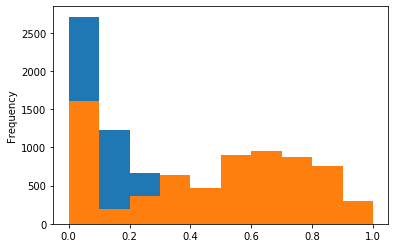

In [87]:
df_churndata['TotalCharges'].plot.hist()
df_churndata['MonthlyCharges'].plot.hist()

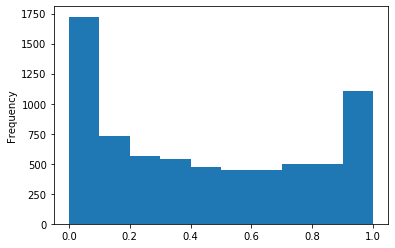

In [91]:
df_churndata.tenure.plot.hist()

In [ ]:
df_churndata